# Drills

In [291]:
# Import necessary libraries
import copy
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
import sklearn.metrics as metrics

1.Load the data using the existing **diabetes** dataset from `scikit-learn`.

In [2]:
# Information on the dataset
# https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
# "Note that the 10 x variables have been standardized to have mean 0 and squared length = 1 (sum(x^2)=1)."
# Original dataset: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt

In [3]:
df = datasets.load_diabetes(as_frame=True)
df = df.frame
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


2.Explore your data by viewing and calculating some basic statistical details like percentile, mean. (TIP: Use Pandas!)

In [4]:
# Statistical summary of columns
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [5]:
print('Mean and standard deviation for columns:')
print([df.mean(), df.std(), df.min(), df.max()])
# It seems the columns are already standardized

Mean and standard deviation for columns:
[age      -3.634285e-16
sex       1.308343e-16
bmi      -8.045349e-16
bp        1.281655e-16
s1       -8.835316e-17
s2        1.327024e-16
s3       -4.574646e-16
s4        3.777301e-16
s5       -3.830854e-16
s6       -3.412882e-16
target    1.521335e+02
dtype: float64, age        0.047619
sex        0.047619
bmi        0.047619
bp         0.047619
s1         0.047619
s2         0.047619
s3         0.047619
s4         0.047619
s5         0.047619
s6         0.047619
target    77.093005
dtype: float64, age       -0.107226
sex       -0.044642
bmi       -0.090275
bp        -0.112400
s1        -0.126781
s2        -0.115613
s3        -0.102307
s4        -0.076395
s5        -0.126097
s6        -0.137767
target    25.000000
dtype: float64, age         0.110727
sex         0.050680
bmi         0.170555
bp          0.132044
s1          0.153914
s2          0.198788
s3          0.181179
s4          0.185234
s5          0.133599
s6          0.135612
target 

In [6]:
# Sum of squares of columns
print('Sum of squares of columns:')
np.square(df).sum()
# It seems the columns are already standardized

Sum of squares of columns:


age              1.0
sex              1.0
bmi              1.0
bp               1.0
s1               1.0
s2               1.0
s3               1.0
s4               1.0
s5               1.0
s6               1.0
target    12850921.0
dtype: float64

In [7]:
# Any missing values? No
df.isnull().any()

age       False
sex       False
bmi       False
bp        False
s1        False
s2        False
s3        False
s4        False
s5        False
s6        False
target    False
dtype: bool

In [8]:
# Pandas profiling
# https://www.analyticsvidhya.com/blog/2021/06/generate-reports-using-pandas-profiling-deploy-using-streamlit/
# profile = ProfileReport(df)
# profile
# Gives errors

3.Create some scatter plots or any other kind of plots that help you understand the data.

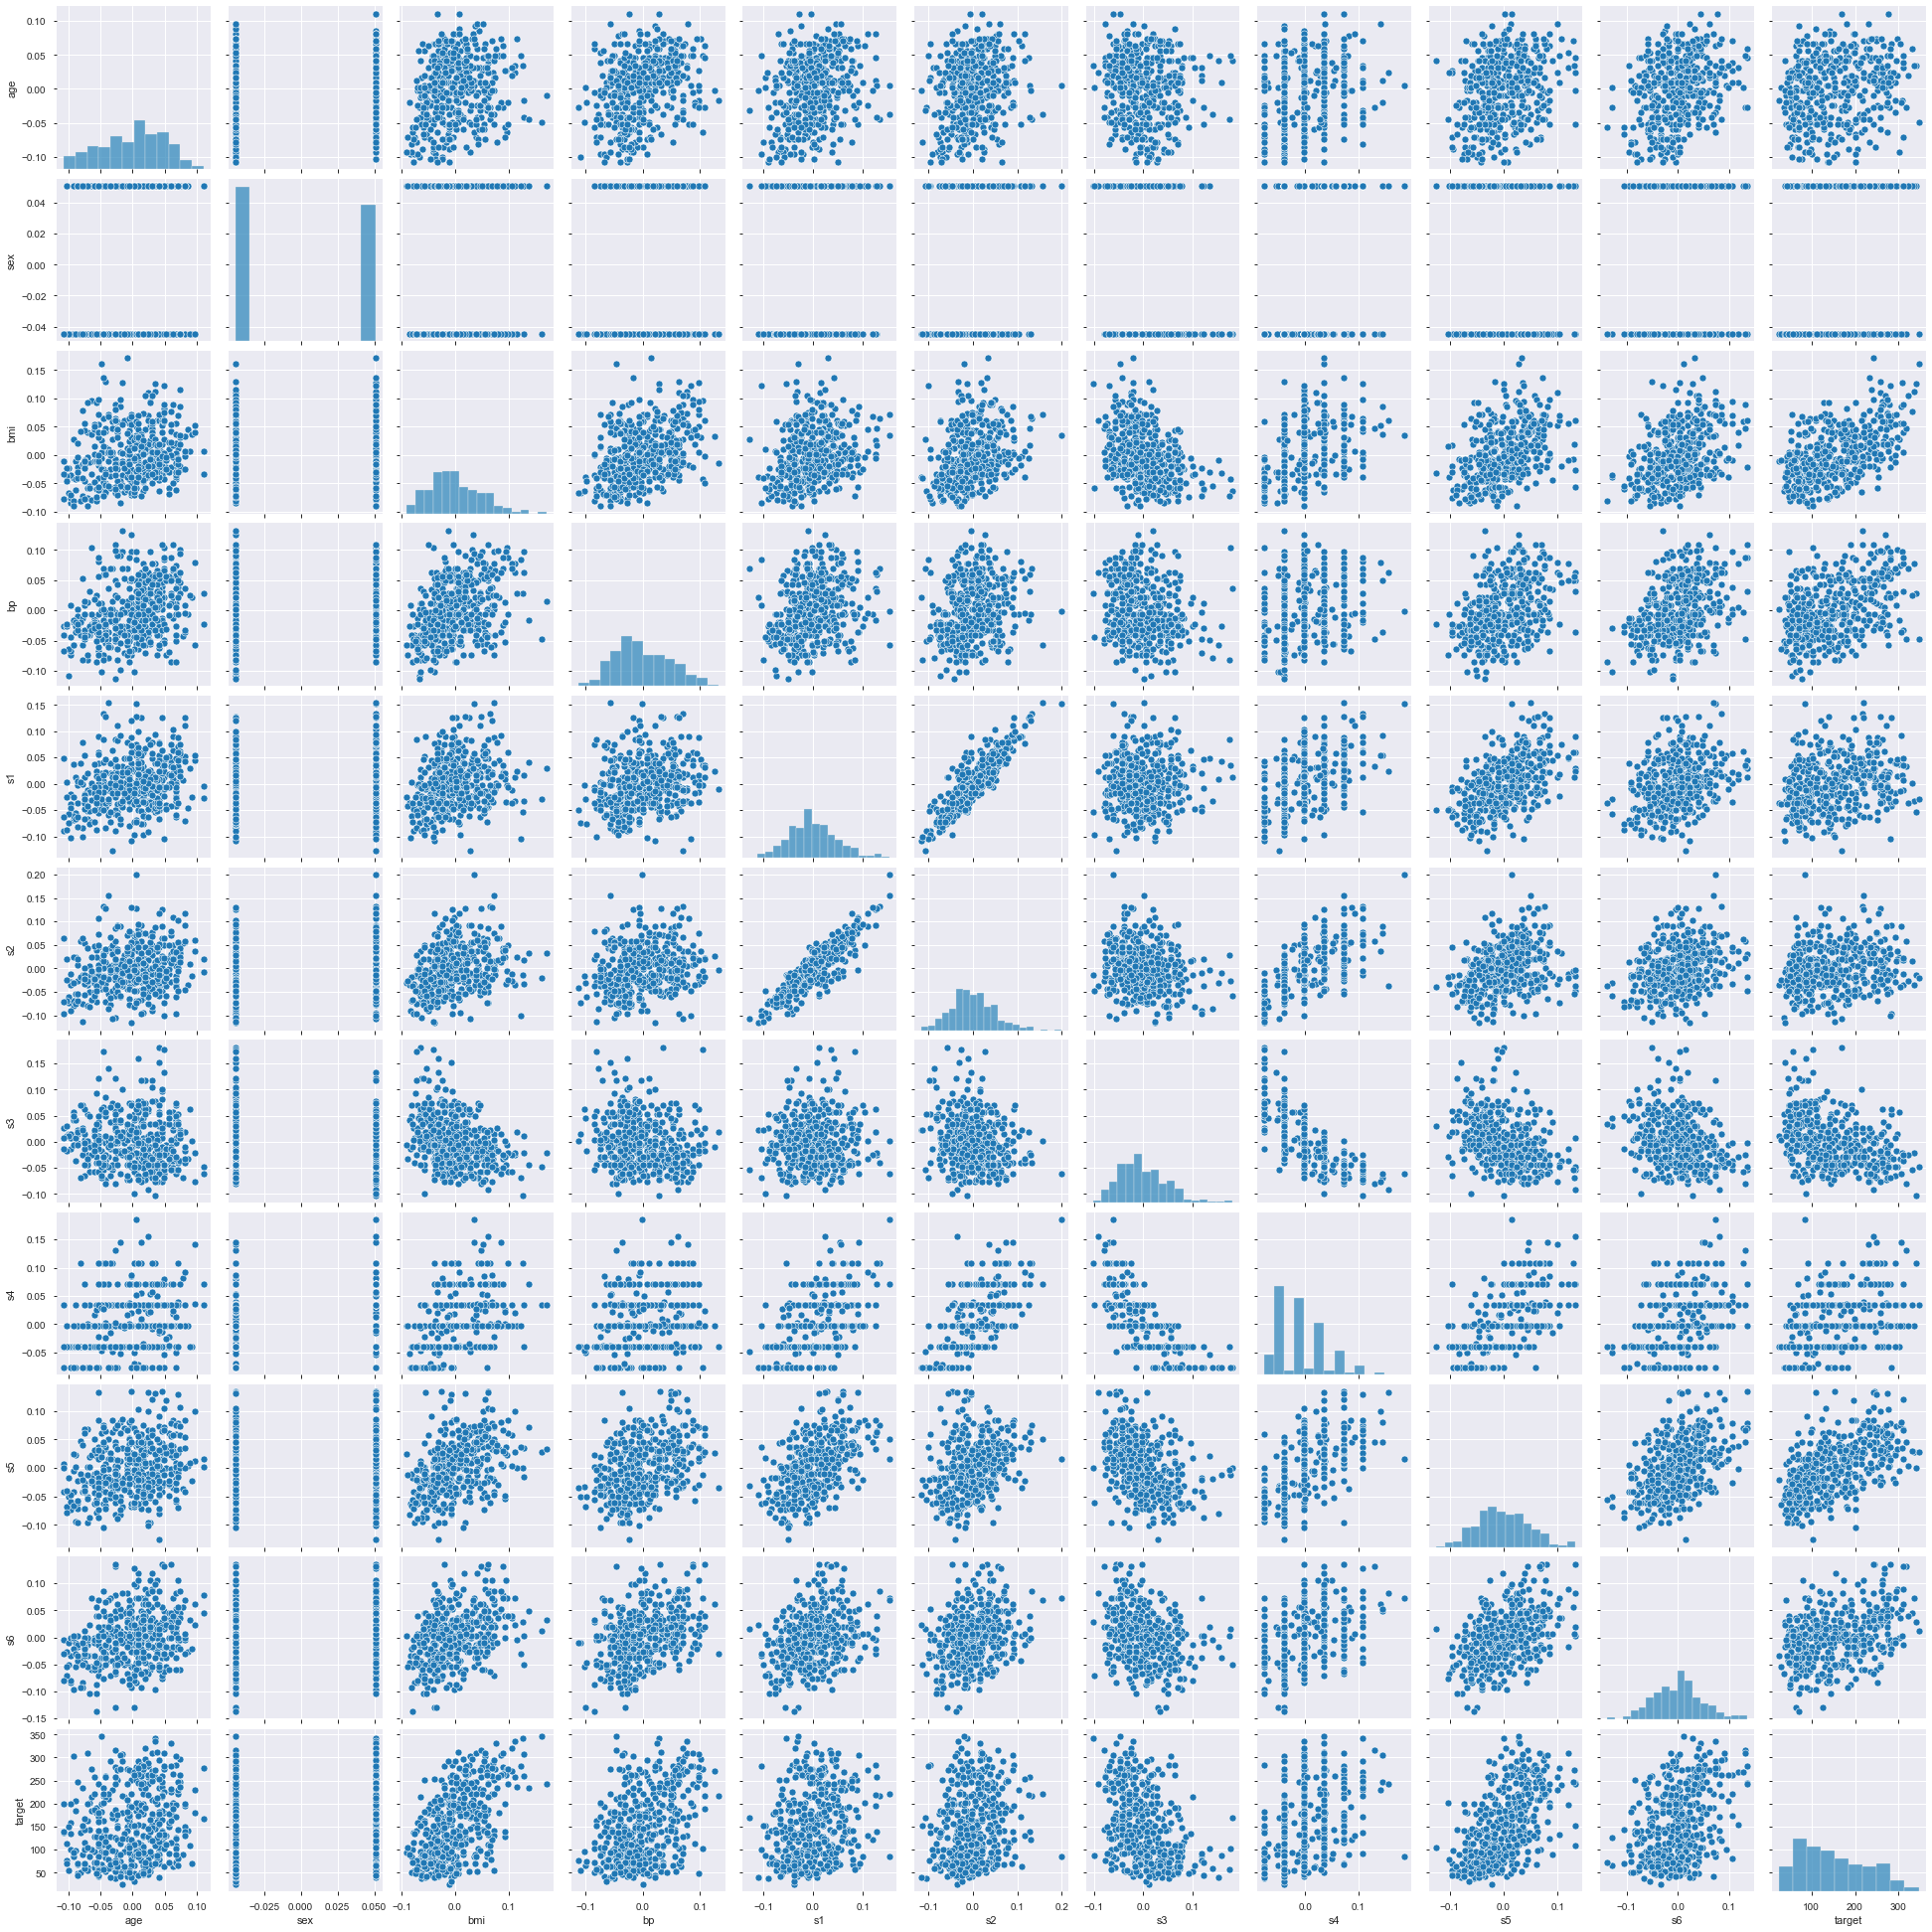

In [9]:
# Pairplot to give a summary of the relationships between the target and features, and across features
pp = sns.pairplot(df)

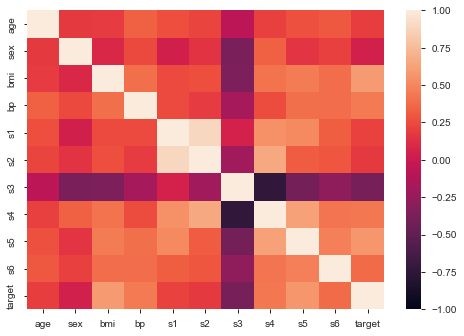

In [10]:
# s1 and s2 seem to be correlated, as well as s3 and s4

# Calculate and plot correlations
corr = df.corr() 
# Heatmap
cp = sns.heatmap(corr, vmin=-1, vmax=1)

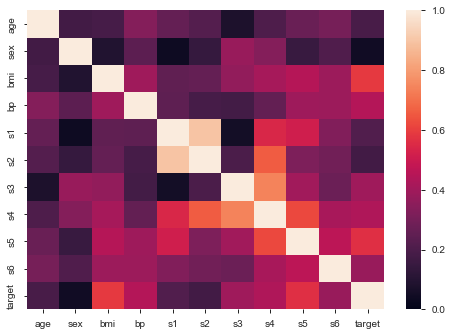

In [432]:
# s1 and s2 seem to be correlated, as well as s3 and s4

# Calculate and plot correlations
corr = df.corr() 
# Heatmap
cp = sns.heatmap(abs(corr), vmin=0, vmax=1)

In [11]:
# What is s4? Should it have discreet values? Are values in-between ok or erronous?
# Also I couldn't find information online on what the columns s1-6 mean
# There are no missing values
# No data cleaning seems to be needed

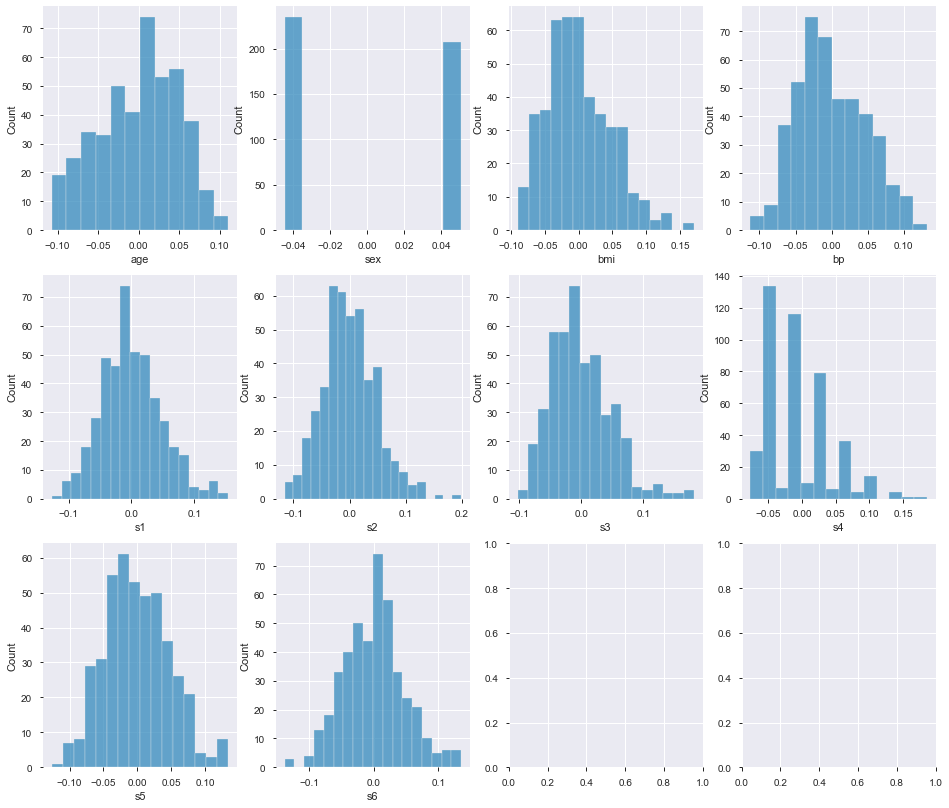

In [12]:
# Subplots the each feature
fig, axes = plt.subplots(3, 4, figsize=(16,14))
  
for feature_no in range(0, df.shape[1]-1):
    axis_no = np.unravel_index(feature_no, axes.shape)
    sns.histplot(df.iloc[:,feature_no], ax=axes[axis_no])

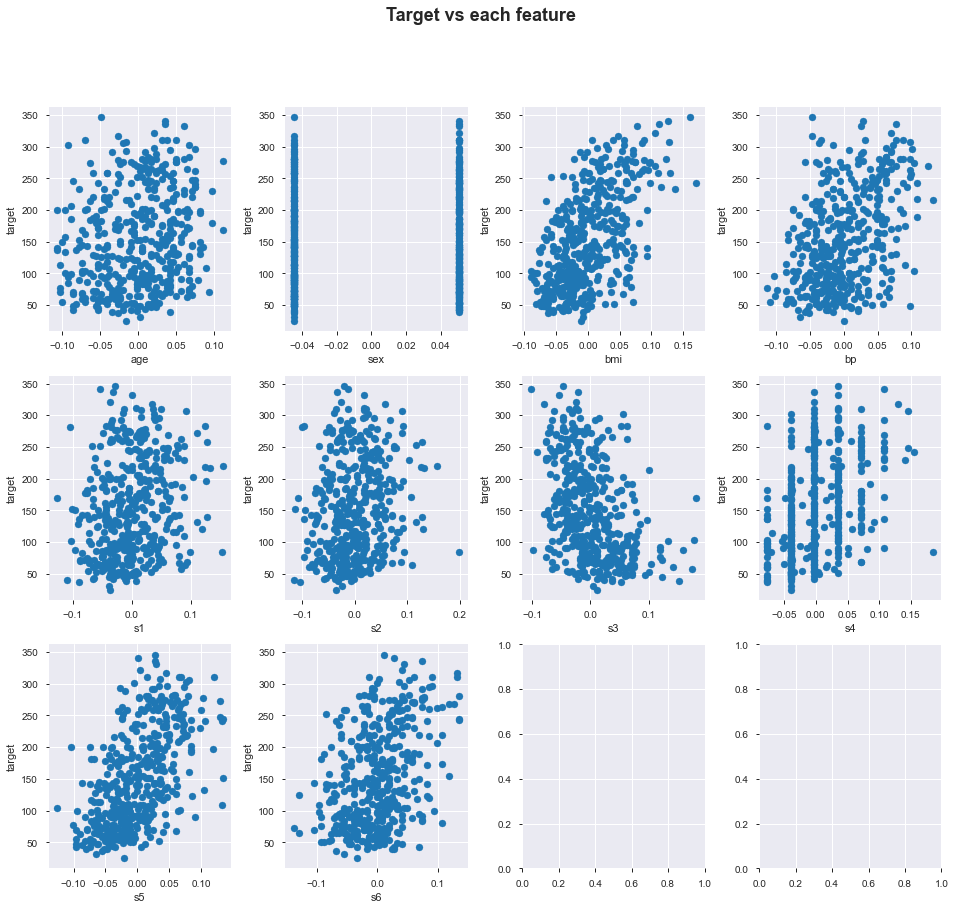

In [13]:
# Subplots the each feature
fig, axes = plt.subplots(3, 4, figsize=(16,14))
plt.subplots_adjust(hspace=0.2, wspace=0.3)

for feature_no in range(0, df.shape[1]-1):
    axis_no = np.unravel_index(feature_no, axes.shape)
    # sns.lmplot(x=df.columns[feature_no], y='target', data=df)
    axes[axis_no].scatter(df[df.columns[feature_no]], df['target'])
    axes[axis_no].set_xlabel(df.columns[feature_no])
    axes[axis_no].set_ylabel('target')

fig.suptitle('Target vs each feature', fontsize=18, fontweight="bold")

plt.show()

4.Create a model and compute the accuracy of it's predictions. 

In [ ]:
# age age in years
# sex
# bmi body mass index
# bp average blood pressure
# s1 tc, total serum cholesterol
# s2 ldl, low-density lipoproteins
# s3 hdl, high-density lipoproteins
# s4 tch, total cholesterol / HDL
# s5 ltg, possibly log of serum triglycerides level
# s6 glu, blood sugar level

In [ ]:
# Some questions
# Is there any single feature that predicts the target on its own?
# How well can we predict the target using only the "easy-to-measure" features?
# Does the addition of blood-sampling related features add anything to the prediction?
# After adding blood-sampling related features, do we lose anything if we remove s2 and s3, 
# since they have high correlation with other features?

In [ ]:
# Hypothesis: All simple features predicts the target better 
# than any single simple feature alone, or after excluding any single simple feature

In [ ]:
# Hypothesis: Addition of blood-sampling related features will enhance prediction
# Hypothesis: Removing s2 and s3 will enhance prediction, or not affect it

In [425]:
# Features and the target as numpy arrays
X = df.iloc[:,:-1].values  # features
y = df.iloc[:, -1].values  # target
all_features = df.columns.values[:-1]

In [426]:
# Standardize the target (like the features) - even though I don't agree with the standardization of the features  
y = y-y.mean()
y = y/np.sqrt(np.power(y, 2).sum())

In [427]:
# Function to select data based on feature names/name lists
def get_data_selected_features(data, feature_names, all_features):
    get_indexes = lambda elem, input_list: [i for (y, i) in zip(input_list, range(len(input_list))) if elem == y]
    indices = []
    for feature_name in feature_names:
        indices.extend(get_indexes(feature_name, all_features))
    
    return data[:, indices], indices

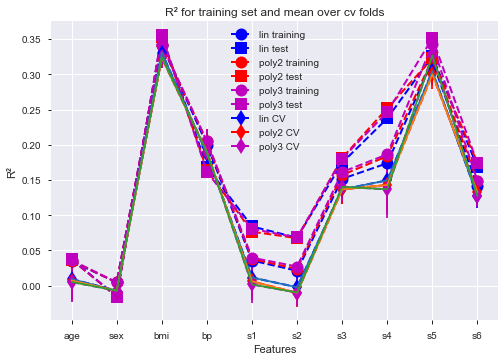

In [530]:
# Train linear and polynomial regressors for each individual feature
R2_individual_features = {'linear':{'train': []}}
R2_individual_features['linear']['test'] = R2_individual_features['linear']['train'][:]  # add [:] to prevent them having the same reference
R2_individual_features['poly2'] = copy.deepcopy(R2_individual_features['linear'])  # deepcopy so iterables in the dict do not have the same reference
R2_individual_features['poly3'] = copy.deepcopy(R2_individual_features['linear'])
CV_scores_individual_features = {'linear': []}
CV_scores_individual_features['poly2'] = CV_scores_individual_features['linear'][:]
CV_scores_individual_features['poly3'] = CV_scores_individual_features['linear'][:]

for feature_no in range(X.shape[1]):
    X_selected = X[:, feature_no]
    # Separate data randomly into training and test sets with 20% of samples in the test set
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=15)
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    
    # Linear regression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    
    R2_train = regressor.score(X_train, y_train)
    R2_test = regressor.score(X_test, y_test)
        
    R2_individual_features['linear']['train'].append(R2_train)
    R2_individual_features['linear']['test'].append(R2_test)
    
    scores = cross_val_score(regressor, X_train, y_train, cv=5).reshape(-1, 1)
    CV_scores_individual_features['linear'].append(scores)

    # Use polynomial regression with degree 2 & 3
    degree = 2
    
    regressor = LinearRegression()
    poly = PolynomialFeatures(degree=degree)
    X_train_poly, X_test_poly = poly.fit_transform(X_train), poly.fit_transform(X_test)
    regressor.fit(X_train_poly, y_train)
    
    R2_train = regressor.score(X_train_poly, y_train)
    R2_test = regressor.score(X_test_poly, y_test)
    
    R2_individual_features['poly2']['train'].append(R2_train)
    R2_individual_features['poly2']['test'].append(R2_test)
    
    scores = cross_val_score(regressor, X_train_poly, y_train, cv=5).reshape(-1, 1)
    CV_scores_individual_features['poly2'].append(scores)
    
    
    degree = 3
    
    regressor = LinearRegression()
    poly = PolynomialFeatures(degree=degree)
    X_train_poly, X_test_poly = poly.fit_transform(X_train), poly.fit_transform(X_test)
    regressor.fit(X_train_poly, y_train)
    
    R2_train = regressor.score(X_train_poly, y_train)
    R2_test = regressor.score(X_test_poly, y_test)
    
    R2_individual_features['poly3']['train'].append(R2_train)
    R2_individual_features['poly3']['test'].append(R2_test)
    
    scores = cross_val_score(regressor, X_train_poly, y_train, cv=5).reshape(-1, 1)
    CV_scores_individual_features['poly3'].append(scores)
     

CV_scores_individual_features['linear'] = np.concatenate(CV_scores_individual_features['linear'], axis=1)
CV_scores_individual_features['poly2'] = np.concatenate(CV_scores_individual_features['poly2'], axis=1)
CV_scores_individual_features['poly3'] = np.concatenate(CV_scores_individual_features['poly3'], axis=1)


plt.plot(range(len(all_features)), R2_individual_features['linear']['train'], 'bo--', linewidth=2, markersize=12, label='lin training')
plt.plot(range(len(all_features)), R2_individual_features['linear']['test'], 'bs--', linewidth=2, markersize=12, label='lin test')
plt.plot(range(len(all_features)), R2_individual_features['poly2']['train'], 'ro--', linewidth=2, markersize=12, label='poly2 training')
plt.plot(range(len(all_features)), R2_individual_features['poly2']['test'], 'rs--', linewidth=2, markersize=12, label='poly2 test')
plt.plot(range(len(all_features)), R2_individual_features['poly3']['train'], 'mo--', linewidth=2, markersize=12, label='poly3 training')
plt.plot(range(len(all_features)), R2_individual_features['poly3']['test'], 'ms--', linewidth=2, markersize=12, label='poly3 test')
plt.plot(range(len(all_features)), CV_scores_individual_features['linear'].mean(axis=0), 'bd--', linewidth=2, markersize=12, label='lin CV')
plt.plot(range(len(all_features)), CV_scores_individual_features['poly2'].mean(axis=0), 'rd--', linewidth=2, markersize=12, label='poly2 CV')
plt.plot(range(len(all_features)), CV_scores_individual_features['poly3'].mean(axis=0), 'md--', linewidth=2, markersize=12, label='poly3 CV')

plt.errorbar(range(len(all_features)), CV_scores_individual_features['linear'].mean(axis=0),
            yerr=CV_scores_individual_features['linear'].std(axis=0)/np.sqrt(CV_scores_individual_features['linear'].shape[0]),
            capsize=4, ecolor='b')
plt.errorbar(range(len(all_features)), CV_scores_individual_features['poly2'].mean(axis=0),
            yerr=CV_scores_individual_features['poly2'].std(axis=0)/np.sqrt(CV_scores_individual_features['poly2'].shape[0]),
            capsize=4, ecolor='r')
plt.errorbar(range(len(all_features)), CV_scores_individual_features['poly3'].mean(axis=0),
            yerr=CV_scores_individual_features['poly3'].std(axis=0)/np.sqrt(CV_scores_individual_features['poly3'].shape[0]),
            capsize=4, ecolor='m')

plt.xlabel('Features')
plt.ylabel('R\u00b2')
plt.xticks(range(len(all_features)), labels=all_features)
plt.title('R\u00b2 for training set and mean over cv folds')
plt.legend()

plt.show()

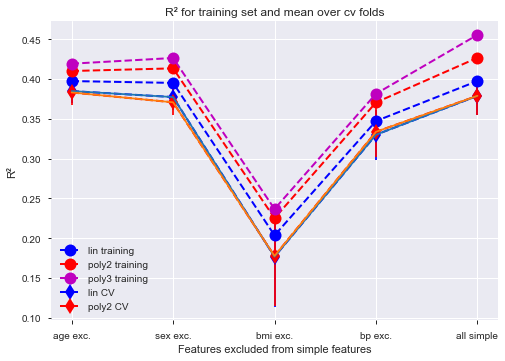

In [544]:
# Prediction with only easy-to-measure features, and also all easy-to-measure features except for one
X_simple_features, index_simple_features = get_data_selected_features(X, ['age', 'sex', 'bmi', 'bp'], df.columns.values)

R2_simple_features = {'linear':{'train': []}}
R2_simple_features['linear']['test'] = R2_simple_features['linear']['train'][:]  # add [:] to prevent them having the same reference
R2_simple_features['poly2'] = copy.deepcopy(R2_simple_features['linear'])  # deepcopy so iterables in the dict do not have the same reference
R2_simple_features['poly3'] = copy.deepcopy(R2_simple_features['linear'])
CV_scores_simple_features = {'linear': []}
CV_scores_simple_features['poly2'] = CV_scores_simple_features['linear'][:]
CV_scores_simple_features['poly3'] = CV_scores_simple_features['linear'][:]

for feature_no in range(X_simple_features.shape[1]+1):
    X_selected = X_simple_features
    
    # Delete one feature, except in the last iteration
    if feature_no<X_simple_features.shape[1]:
        X_selected = np.delete(X_selected, feature_no, axis=1)
        
    # Separate data randomly into training and test sets with 20% of samples in the test set
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=15)
    
    # Linear regression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    
    R2_train = regressor.score(X_train, y_train)
    R2_test = regressor.score(X_test, y_test)
        
    R2_simple_features['linear']['train'].append(R2_train)
    R2_simple_features['linear']['test'].append(R2_test)
    
    scores = cross_val_score(regressor, X_train, y_train, cv=5).reshape(-1, 1)
    CV_scores_simple_features['linear'].append(scores)

    # Use polynomial regression with degree 2 & 3
    degree = 2
    
    regressor = LinearRegression()
    poly = PolynomialFeatures(degree=degree)
    X_train_poly, X_test_poly = poly.fit_transform(X_train), poly.fit_transform(X_test)
    regressor.fit(X_train_poly, y_train)
    
    R2_train = regressor.score(X_train_poly, y_train)
    R2_test = regressor.score(X_test_poly, y_test)
    
    R2_simple_features['poly2']['train'].append(R2_train)
    R2_simple_features['poly2']['test'].append(R2_test)
    
    scores = cross_val_score(regressor, X_train_poly, y_train, cv=5).reshape(-1, 1)
    CV_scores_simple_features['poly2'].append(scores)
    
    
    degree = 3
    
    regressor = LinearRegression()
    poly = PolynomialFeatures(degree=degree)
    X_train_poly, X_test_poly = poly.fit_transform(X_train), poly.fit_transform(X_test)
    regressor.fit(X_train_poly, y_train)
    
    R2_train = regressor.score(X_train_poly, y_train)
    R2_test = regressor.score(X_test_poly, y_test)
    
    R2_simple_features['poly3']['train'].append(R2_train)
    R2_simple_features['poly3']['test'].append(R2_test)
    
    scores = cross_val_score(regressor, X_train_poly, y_train, cv=5).reshape(-1, 1)
    CV_scores_simple_features['poly3'].append(scores)
     

CV_scores_simple_features['linear'] = np.concatenate(CV_scores_simple_features['linear'], axis=1)
CV_scores_simple_features['poly2'] = np.concatenate(CV_scores_simple_features['poly2'], axis=1)
CV_scores_simple_features['poly3'] = np.concatenate(CV_scores_simple_features['poly3'], axis=1)


plt.plot(R2_simple_features['linear']['train'], 'bo--', linewidth=2, markersize=12, label='lin training')
# plt.plot(R2_simple_features['linear']['test'], 'bs--', linewidth=2, markersize=12, label='lin test')
plt.plot(range(X_simple_features.shape[1]+1), R2_simple_features['poly2']['train'], 'ro--', linewidth=2, markersize=12, label='poly2 training')
# plt.plot(R2_simple_features['poly2']['test'], 'rs--', linewidth=2, markersize=12, label='poly2 test')
plt.plot(range(X_simple_features.shape[1]+1), R2_simple_features['poly3']['train'], 'mo--', linewidth=2, markersize=12, label='poly3 training')
# plt.plot(R2_simple_features['poly3']['test'], 'ms--', linewidth=2, markersize=12, label='poly3 test')
plt.plot(CV_scores_simple_features['linear'].mean(axis=0), 'bd--', linewidth=2, markersize=12, label='lin CV')
plt.plot(CV_scores_simple_features['poly2'].mean(axis=0), 'rd--', linewidth=2, markersize=12, label='poly2 CV')
# plt.plot(CV_scores_simple_features['poly3'].mean(axis=0), 'md--', linewidth=2, markersize=12, label='poly3 CV')

plt.errorbar(range(X_simple_features.shape[1]+1), CV_scores_simple_features['linear'].mean(axis=0),
            yerr=CV_scores_simple_features['linear'].std(axis=0)/np.sqrt(CV_scores_simple_features['linear'].shape[0]),
            capsize=4, ecolor='b')
plt.errorbar(range(X_simple_features.shape[1]+1), CV_scores_simple_features['poly2'].mean(axis=0),
            yerr=CV_scores_simple_features['poly2'].std(axis=0)/np.sqrt(CV_scores_simple_features['poly2'].shape[0]),
            capsize=4, ecolor='r')
# plt.errorbar(range(X_simple_features.shape[1]+1), CV_scores_simple_features['poly3'].mean(axis=0),
#             yerr=CV_scores_simple_features['poly2'].std(axis=0)/np.sqrt(CV_scores_simple_features['poly2'].shape[0]),
#             capsize=4, ecolor='m')

plt.xlabel('Features excluded from simple features')
plt.ylabel('R\u00b2')
plt.xticks(range(X_simple_features.shape[1]+1), labels=['age exc.', 'sex exc.', 'bmi exc.', 'bp exc.', 'all simple'])
plt.title('R\u00b2 for training set and mean over cv folds')
plt.legend()
plt.show()

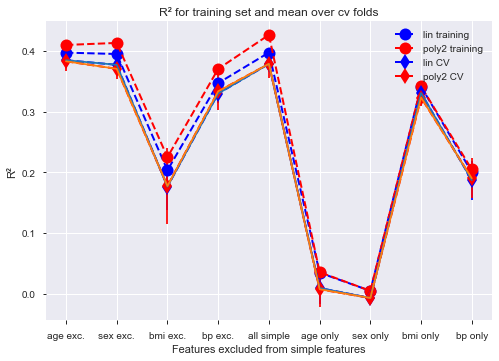

In [595]:
# Plot again without poly3, and also with individual features
plt.plot(R2_simple_features['linear']['train'] + [R2_individual_features['linear']['train'][i] for i in index_simple_features], 
         'bo--', linewidth=2, markersize=12, label='lin training')
plt.plot(R2_simple_features['poly2']['train'] + [R2_individual_features['poly2']['train'][i] for i in index_simple_features], 
         'ro--', linewidth=2, markersize=12, label='poly2 training')
plt.plot(np.concatenate((CV_mean_scores_simple_features['linear'].mean(axis=0), CV_scores_individual_features['linear'][:, index_simple_features].mean(axis=0))), 
         'bd--', linewidth=2, markersize=12, label='lin CV')
plt.plot(np.concatenate((CV_mean_scores_simple_features['poly2'].mean(axis=0), CV_scores_individual_features['poly2'][:, index_simple_features].mean(axis=0))), 
         'rd--', linewidth=2, markersize=12, label='poly2 CV')
 
plt.errorbar(range(CV_mean_scores_simple_features['linear'].shape[1]+CV_scores_individual_features['linear'][:, index_simple_features].shape[1]), 
             np.concatenate((CV_mean_scores_simple_features['linear'].mean(axis=0), CV_scores_individual_features['linear'][:, index_simple_features].mean(axis=0))),
             yerr=np.concatenate((CV_mean_scores_simple_features['linear'], CV_scores_individual_features['linear'][:, index_simple_features]), axis=1).std(axis=0)/np.sqrt(CV_scores_simple_features['poly2'].shape[0]),
             capsize=4, ecolor='b')
plt.errorbar(range(CV_mean_scores_simple_features['poly2'].shape[1]+CV_scores_individual_features['poly2'][:, index_simple_features].shape[1]), 
             np.concatenate((CV_mean_scores_simple_features['poly2'].mean(axis=0), CV_scores_individual_features['poly2'][:, index_simple_features].mean(axis=0))),
             yerr=np.concatenate((CV_mean_scores_simple_features['poly2'], CV_scores_individual_features['poly2'][:, index_simple_features]), axis=1).std(axis=0)/np.sqrt(CV_scores_simple_features['poly2'].shape[0]),
             capsize=4, ecolor='r')

plt.xlabel('Features excluded from simple features')
plt.ylabel('R\u00b2')
plt.xticks(range(X_simple_features.shape[1]+1+len(index_simple_features)), 
           labels=['age exc.', 'sex exc.', 'bmi exc.', 'bp exc.', 'all simple', 'age only', 'sex only', 'bmi only', 'bp only'])
plt.title('R\u00b2 for training set and mean over cv folds')
plt.legend()
plt.show()

# Removing bmi as a feature has the greatest effect on the score
# Including all simple variables:
# - predicts better than only using bmi
# - is slightly better than removing only age or only sex


In [612]:
# Add blood-related features to the data
R2_all_features = {'linear':{'train': []}}
R2_all_features['linear']['test'] = R2_all_features['linear']['train'][:]  # add [:] to prevent them having the same reference
R2_all_features['poly2'] = copy.deepcopy(R2_all_features['linear'])  # deepcopy so iterables in the dict do not have the same reference
R2_all_features['poly3'] = copy.deepcopy(R2_all_features['linear'])
CV_scores_all_features = {'linear': []}
CV_scores_all_features['poly2'] = CV_scores_all_features['linear'][:]
CV_scores_all_features['poly3'] = CV_scores_all_features['linear'][:]

# Separate data randomly into training and test sets with 20% of samples in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
    
# Linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
    
R2_train = regressor.score(X_train, y_train)
R2_test = regressor.score(X_test, y_test)
        
R2_all_features['linear']['train'].append(R2_train)
R2_all_features['linear']['test'].append(R2_test)

scores = cross_val_score(regressor, X_train, y_train, cv=5).reshape(-1, 1)
CV_scores_all_features['linear'].append(scores)

# Use polynomial regression with degree 2 & 3
degree = 2
    
regressor = LinearRegression()
poly = PolynomialFeatures(degree=degree)
X_train_poly, X_test_poly = poly.fit_transform(X_train), poly.fit_transform(X_test)
regressor.fit(X_train_poly, y_train)
    
R2_train = regressor.score(X_train_poly, y_train)
R2_test = regressor.score(X_test_poly, y_test)
    
R2_all_features['poly2']['train'].append(R2_train)
R2_all_features['poly2']['test'].append(R2_test)
    
scores = cross_val_score(regressor, X_train_poly, y_train, cv=5).reshape(-1, 1)
CV_scores_all_features['poly2'].append(scores)
    
    
degree = 3
    
regressor = LinearRegression()
poly = PolynomialFeatures(degree=degree)
X_train_poly, X_test_poly = poly.fit_transform(X_train), poly.fit_transform(X_test)
regressor.fit(X_train_poly, y_train)

R2_train = regressor.score(X_train_poly, y_train)
R2_test = regressor.score(X_test_poly, y_test)
    
R2_all_features['poly3']['train'].append(R2_train)
R2_all_features['poly3']['test'].append(R2_test)
    
scores = cross_val_score(regressor, X_train_poly, y_train, cv=5).reshape(-1, 1)
CV_scores_all_features['poly3'].append(scores)

CV_scores_all_features['linear'] = np.concatenate(CV_scores_all_features['linear'], axis=1)
CV_scores_all_features['poly2'] = np.concatenate(CV_scores_all_features['poly2'], axis=1)
CV_scores_all_features['poly3'] = np.concatenate(CV_scores_all_features['poly3'], axis=1)


6

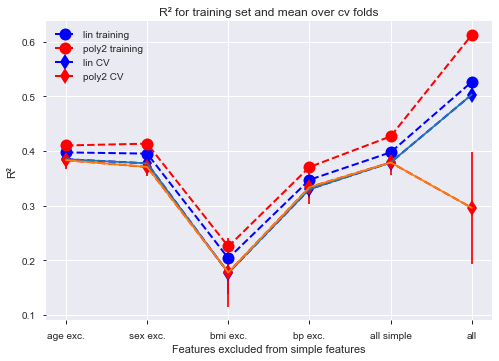

In [632]:
# Plot for all simple features, and also for all features
plt.plot(R2_simple_features['linear']['train'] + R2_all_features['linear']['train'], 
         'bo--', linewidth=2, markersize=12, label='lin training')
plt.plot(R2_simple_features['poly2']['train'] + R2_all_features['poly2']['train'], 
         'ro--', linewidth=2, markersize=12, label='poly2 training')

plt.plot(np.concatenate((CV_mean_scores_simple_features['linear'].mean(axis=0), CV_scores_all_features['linear'].mean(axis=0))), 
         'bd--', linewidth=2, markersize=12, label='lin CV')
plt.plot(np.concatenate((CV_mean_scores_simple_features['poly2'].mean(axis=0), CV_scores_all_features['poly2'].mean(axis=0))), 
         'rd--', linewidth=2, markersize=12, label='poly2 CV')

plt.errorbar(range(CV_mean_scores_simple_features['linear'].shape[1]+CV_scores_all_features['linear'].shape[1]), 
             np.concatenate((CV_mean_scores_simple_features['linear'].mean(axis=0), CV_scores_all_features['linear'].mean(axis=0))),
             yerr=np.concatenate((CV_mean_scores_simple_features['linear'], CV_scores_all_features['linear']), axis=1).std(axis=0)/np.sqrt(CV_scores_simple_features['poly2'].shape[0]),
             capsize=4, ecolor='b')
plt.errorbar(range(CV_mean_scores_simple_features['poly2'].shape[1]+CV_scores_all_features['poly2'].shape[1]), 
             np.concatenate((CV_mean_scores_simple_features['poly2'].mean(axis=0), CV_scores_all_features['poly2'].mean(axis=0))),
             yerr=np.concatenate((CV_mean_scores_simple_features['poly2'], CV_scores_all_features['poly2']), axis=1).std(axis=0)/np.sqrt(CV_scores_simple_features['poly2'].shape[0]),
             capsize=4, ecolor='r')

plt.xlabel('Features excluded from simple features')
plt.ylabel('R\u00b2')
plt.xticks(range(CV_mean_scores_simple_features['linear'].shape[1]+CV_scores_all_features['linear'].shape[1]), 
           labels=['age exc.', 'sex exc.', 'bmi exc.', 'bp exc.', 'all simple', 'all'])
plt.title('R\u00b2 for training set and mean over cv folds')
plt.legend()
plt.show()


# Adding all blood related features enhances prediction

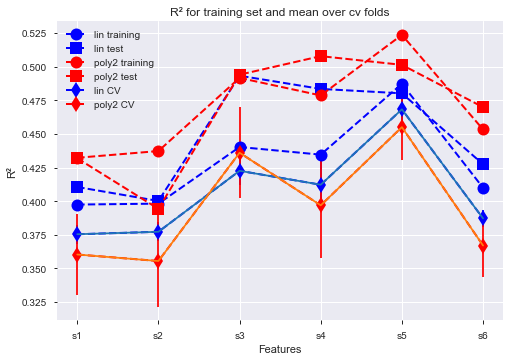

In [635]:
# Add only 1 blood-related feature to all simple features,
# I'm especially interested if blood glucose alone can add to the prediction of disease progression
R2_simple_plus_features = {'linear':{'train': []}}
R2_simple_plus_features['linear']['test'] = R2_simple_plus_features['linear']['train'][:]  # add [:] to prevent them having the same reference
R2_simple_plus_features['poly2'] = copy.deepcopy(R2_simple_plus_features['linear'])  # deepcopy so iterables in the dict do not have the same reference
R2_simple_plus_features['poly3'] = copy.deepcopy(R2_simple_plus_features['linear'])
CV_scores_simple_plus_features = {'linear': []}
CV_scores_simple_plus_features['poly2'] = CV_scores_simple_plus_features['linear'][:]
CV_scores_simple_plus_features['poly3'] = CV_scores_simple_plus_features['linear'][:]
 
for feature_no in range(4, X.shape[1]):
    X_selected = np.concatenate((X_simple_features, X[:, feature_no].reshape(-1, 1)), axis=1)
    
    # Separate data randomly into training and test sets with 20% of samples in the test set
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=15)
    
    # Linear regression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    
    R2_train = regressor.score(X_train, y_train)
    R2_test = regressor.score(X_test, y_test)
        
    R2_simple_plus_features['linear']['train'].append(R2_train)
    R2_simple_plus_features['linear']['test'].append(R2_test)
    
    scores = cross_val_score(regressor, X_train, y_train, cv=5).reshape(-1, 1)
    CV_scores_simple_plus_features['linear'].append(scores)

    # Use polynomial regression with degree 2 & 3
    degree = 2
    
    regressor = LinearRegression()
    poly = PolynomialFeatures(degree=degree)
    X_train_poly, X_test_poly = poly.fit_transform(X_train), poly.fit_transform(X_test)
    regressor.fit(X_train_poly, y_train)
    
    R2_train = regressor.score(X_train_poly, y_train)
    R2_test = regressor.score(X_test_poly, y_test)
    
    R2_simple_plus_features['poly2']['train'].append(R2_train)
    R2_simple_plus_features['poly2']['test'].append(R2_test)
    
    scores = cross_val_score(regressor, X_train_poly, y_train, cv=5).reshape(-1, 1)
    CV_scores_simple_plus_features['poly2'].append(scores)
    
    
    degree = 3
    
    regressor = LinearRegression()
    poly = PolynomialFeatures(degree=degree)
    X_train_poly, X_test_poly = poly.fit_transform(X_train), poly.fit_transform(X_test)
    regressor.fit(X_train_poly, y_train)
    
    R2_train = regressor.score(X_train_poly, y_train)
    R2_test = regressor.score(X_test_poly, y_test)
    
    R2_simple_plus_features['poly3']['train'].append(R2_train)
    R2_simple_plus_features['poly3']['test'].append(R2_test)
    
    scores = cross_val_score(regressor, X_train_poly, y_train, cv=5).reshape(-1, 1)
    CV_scores_simple_plus_features['poly3'].append(scores)
     
CV_scores_simple_plus_features['linear'] = np.concatenate(CV_scores_simple_plus_features['linear'], axis=1)
CV_scores_simple_plus_features['poly2'] = np.concatenate(CV_scores_simple_plus_features['poly2'], axis=1)
CV_scores_simple_plus_features['poly3'] = np.concatenate(CV_scores_simple_plus_features['poly3'], axis=1)

plt.plot(R2_simple_plus_features['linear']['train'], 'bo--', linewidth=2, markersize=12, label='lin training')
plt.plot(R2_simple_plus_features['linear']['test'], 'bs--', linewidth=2, markersize=12, label='lin test')
plt.plot(R2_simple_plus_features['poly2']['train'], 'ro--', linewidth=2, markersize=12, label='poly2 training')
plt.plot(R2_simple_plus_features['poly2']['test'], 'rs--', linewidth=2, markersize=12, label='poly2 test')
# plt.plot(R2_simple_plus_features['poly3']['train'], 'mo--', linewidth=2, markersize=12, label='poly3 training')
# plt.plot(R2_simple_plus_features['poly3']['test'], 'ms--', linewidth=2, markersize=12, label='poly3 test')

plt.plot(CV_scores_simple_plus_features['linear'].mean(axis=0), 'bd--', linewidth=2, markersize=12, label='lin CV')
plt.plot(CV_scores_simple_plus_features['poly2'].mean(axis=0), 'rd--', linewidth=2, markersize=12, label='poly2 CV')
# plt.plot(CV_scores_simple_plus_features['poly3'].mean(axis=0), 'md--', linewidth=2, markersize=12, label='poly3 CV')

plt.errorbar(range(CV_scores_simple_plus_features['linear'].shape[1]), CV_scores_simple_plus_features['linear'].mean(axis=0),
            yerr=CV_scores_simple_plus_features['linear'].std(axis=0)/np.sqrt(CV_scores_simple_plus_features['linear'].shape[0]),
            capsize=4, ecolor='b')
plt.errorbar(range(CV_scores_simple_plus_features['poly2'].shape[1]), CV_scores_simple_plus_features['poly2'].mean(axis=0),
            yerr=CV_scores_simple_plus_features['poly2'].std(axis=0)/np.sqrt(CV_scores_simple_plus_features['poly2'].shape[0]),
            capsize=4, ecolor='r')
# plt.errorbar(range(CV_scores_simple_plus_features['poly3'].shape[1]), CV_scores_simple_plus_features['poly3'].mean(axis=0),
#              yerr=CV_scores_simple_plus_features['poly3'].std(axis=0)/np.sqrt(CV_scores_simple_plus_features['poly3'].shape[0]),
#              capsize=4, ecolor='m')

plt.xlabel('Features')
plt.ylabel('R\u00b2')
plt.xticks(range(len(range(4, X.shape[1]))), labels=all_features[range(4, X.shape[1])])
plt.title('R\u00b2 for training set and mean over cv folds')
plt.legend()
plt.show()

# Adding only s5 has the highest effect

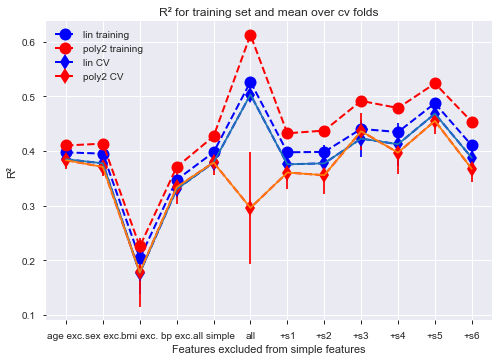

In [658]:
# Plot for all simple features, all features, and only 1 blood-related feature added (for each of them)
plt.plot(R2_simple_features['linear']['train'] + R2_all_features['linear']['train'] + R2_simple_plus_features['linear']['train'], 
         'bo--', linewidth=2, markersize=12, label='lin training')
plt.plot(R2_simple_features['poly2']['train'] + R2_all_features['poly2']['train'] + R2_simple_plus_features['poly2']['train'], 
         'ro--', linewidth=2, markersize=12, label='poly2 training')

plt.plot(np.concatenate((CV_mean_scores_simple_features['linear'].mean(axis=0), CV_scores_all_features['linear'].mean(axis=0)
                        , CV_scores_simple_plus_features['linear'].mean(axis=0))), 
         'bd--', linewidth=2, markersize=12, label='lin CV')
plt.plot(np.concatenate((CV_mean_scores_simple_features['poly2'].mean(axis=0), CV_scores_all_features['poly2'].mean(axis=0)
                        , CV_scores_simple_plus_features['poly2'].mean(axis=0))), 
         'rd--', linewidth=2, markersize=12, label='poly2 CV')

plt.errorbar(range(CV_mean_scores_simple_features['linear'].shape[1]+CV_scores_all_features['linear'].shape[1]+CV_scores_simple_plus_features['poly2'].shape[1]), 
             np.concatenate((CV_mean_scores_simple_features['linear'].mean(axis=0), 
                             CV_scores_all_features['linear'].mean(axis=0),
                             CV_scores_simple_plus_features['linear'].mean(axis=0))),
             yerr=np.concatenate((CV_mean_scores_simple_features['linear'], CV_scores_all_features['linear'], CV_scores_simple_plus_features['poly2']), axis=1).std(axis=0)/np.sqrt(CV_scores_simple_features['poly2'].shape[0]),
             capsize=4, ecolor='b')
plt.errorbar(range(CV_mean_scores_simple_features['poly2'].shape[1]+CV_scores_all_features['poly2'].shape[1]+CV_scores_simple_plus_features['poly2'].shape[1]), 
             np.concatenate((CV_mean_scores_simple_features['poly2'].mean(axis=0), 
                             CV_scores_all_features['poly2'].mean(axis=0),
                             CV_scores_simple_plus_features['poly2'].mean(axis=0))),
             yerr=np.concatenate((CV_mean_scores_simple_features['poly2'], CV_scores_all_features['poly2'], CV_scores_simple_plus_features['poly2']), axis=1).std(axis=0)/np.sqrt(CV_scores_simple_features['poly2'].shape[0]),
             capsize=4, ecolor='r')

plt.xlabel('Features excluded from simple features')
plt.ylabel('R\u00b2')
plt.xticks(range(CV_mean_scores_simple_features['linear'].shape[1]+CV_scores_all_features['linear'].shape[1]+CV_scores_simple_plus_features['poly2'].shape[1]), 
           labels=['age exc.', 'sex exc.', 'bmi exc.', 'bp exc.', 'all simple', 'all', 
                   '+s1', '+s2', '+s3', '+s4', '+s5', '+s6'])
plt.title('R\u00b2 for training set and mean over cv folds')
plt.legend()
plt.show()



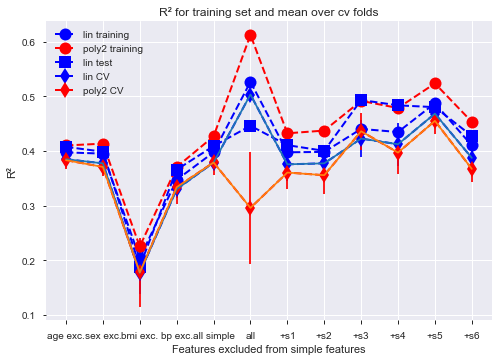

In [656]:
# Plot for all simple features, all features, and only 1 blood-related feature added (for each of them)
plt.plot(R2_simple_features['linear']['train'] + R2_all_features['linear']['train'] + R2_simple_plus_features['linear']['train'], 
         'bo--', linewidth=2, markersize=12, label='lin training')
plt.plot(R2_simple_features['poly2']['train'] + R2_all_features['poly2']['train'] + R2_simple_plus_features['poly2']['train'], 
         'ro--', linewidth=2, markersize=12, label='poly2 training')

plt.plot(R2_simple_features['linear']['test'] + R2_all_features['linear']['test'] + R2_simple_plus_features['linear']['test'], 
         'bs--', linewidth=2, markersize=12, label='lin test')

plt.plot(np.concatenate((CV_mean_scores_simple_features['linear'].mean(axis=0), CV_scores_all_features['linear'].mean(axis=0)
                        , CV_scores_simple_plus_features['linear'].mean(axis=0))), 
         'bd--', linewidth=2, markersize=12, label='lin CV')
plt.plot(np.concatenate((CV_mean_scores_simple_features['poly2'].mean(axis=0), CV_scores_all_features['poly2'].mean(axis=0)
                        , CV_scores_simple_plus_features['poly2'].mean(axis=0))), 
         'rd--', linewidth=2, markersize=12, label='poly2 CV')

plt.errorbar(range(CV_mean_scores_simple_features['linear'].shape[1]+CV_scores_all_features['linear'].shape[1]+CV_scores_simple_plus_features['poly2'].shape[1]), 
             np.concatenate((CV_mean_scores_simple_features['linear'].mean(axis=0), 
                             CV_scores_all_features['linear'].mean(axis=0),
                             CV_scores_simple_plus_features['linear'].mean(axis=0))),
             yerr=np.concatenate((CV_mean_scores_simple_features['linear'], CV_scores_all_features['linear'], CV_scores_simple_plus_features['poly2']), axis=1).std(axis=0)/np.sqrt(CV_scores_simple_features['poly2'].shape[0]),
             capsize=4, ecolor='b')
plt.errorbar(range(CV_mean_scores_simple_features['poly2'].shape[1]+CV_scores_all_features['poly2'].shape[1]+CV_scores_simple_plus_features['poly2'].shape[1]), 
             np.concatenate((CV_mean_scores_simple_features['poly2'].mean(axis=0), 
                             CV_scores_all_features['poly2'].mean(axis=0),
                             CV_scores_simple_plus_features['poly2'].mean(axis=0))),
             yerr=np.concatenate((CV_mean_scores_simple_features['poly2'], CV_scores_all_features['poly2'], CV_scores_simple_plus_features['poly2']), axis=1).std(axis=0)/np.sqrt(CV_scores_simple_features['poly2'].shape[0]),
             capsize=4, ecolor='r')

plt.xlabel('Features excluded from simple features')
plt.ylabel('R\u00b2')
plt.xticks(range(CV_mean_scores_simple_features['linear'].shape[1]+CV_scores_all_features['linear'].shape[1]+CV_scores_simple_plus_features['poly2'].shape[1]), 
           labels=['age exc.', 'sex exc.', 'bmi exc.', 'bp exc.', 'all simple', 'all', 
                   '+s1', '+s2', '+s3', '+s4', '+s5', '+s6'])
plt.title('R\u00b2 for training set and mean over cv folds')
plt.legend()
plt.show()



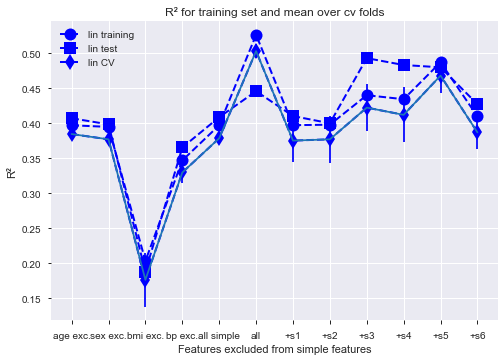

In [657]:
# Plot for all simple features, all features, and only 1 blood-related feature added (for each of them)
plt.plot(R2_simple_features['linear']['train'] + R2_all_features['linear']['train'] + R2_simple_plus_features['linear']['train'], 
         'bo--', linewidth=2, markersize=12, label='lin training')

plt.plot(R2_simple_features['linear']['test'] + R2_all_features['linear']['test'] + R2_simple_plus_features['linear']['test'], 
         'bs--', linewidth=2, markersize=12, label='lin test')

plt.plot(np.concatenate((CV_mean_scores_simple_features['linear'].mean(axis=0), CV_scores_all_features['linear'].mean(axis=0)
                        , CV_scores_simple_plus_features['linear'].mean(axis=0))), 
         'bd--', linewidth=2, markersize=12, label='lin CV')

plt.errorbar(range(CV_mean_scores_simple_features['linear'].shape[1]+CV_scores_all_features['linear'].shape[1]+CV_scores_simple_plus_features['poly2'].shape[1]), 
             np.concatenate((CV_mean_scores_simple_features['linear'].mean(axis=0), 
                             CV_scores_all_features['linear'].mean(axis=0),
                             CV_scores_simple_plus_features['linear'].mean(axis=0))),
             yerr=np.concatenate((CV_mean_scores_simple_features['linear'], CV_scores_all_features['linear'], CV_scores_simple_plus_features['poly2']), axis=1).std(axis=0)/np.sqrt(CV_scores_simple_features['poly2'].shape[0]),
             capsize=4, ecolor='b')

plt.xlabel('Features excluded from simple features')
plt.ylabel('R\u00b2')
plt.xticks(range(CV_mean_scores_simple_features['linear'].shape[1]+CV_scores_all_features['linear'].shape[1]+CV_scores_simple_plus_features['poly2'].shape[1]), 
           labels=['age exc.', 'sex exc.', 'bmi exc.', 'bp exc.', 'all simple', 'all', 
                   '+s1', '+s2', '+s3', '+s4', '+s5', '+s6'])
plt.title('R\u00b2 for training set and mean over cv folds')
plt.legend()
plt.show()


# Adding all blood related features enhances prediction

In [137]:
# Stochastic gradient descent with sklearn
clf = SGDRegressor(loss="squared_loss", penalty="l1", max_iter=10000, alpha=0.0001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"R\u00b2 is {clf.score(X_train, y_train):.4f}")
print(f"R\u00b2 is {clf.score(X_test, y_test):.4f}")
clf.coef_

R² is 0.0247
R² is -0.0020


array([ 0.00165976,  0.        ,  0.00491496,  0.00407521,  0.00178536,
        0.00128761, -0.00312794,  0.00361569,  0.00495189,  0.00315288])

In [119]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores

array([0.43451956, 0.41171055, 0.59392089, 0.37048389, 0.5361195 ])

In [186]:
# Stochastic gradient descent with sklearn / polynomial
clf = SGDRegressor(loss="squared_loss", penalty="l1", max_iter=1000, alpha=0.0001)
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly, X_test_poly = poly.fit_transform(X_train), poly.fit_transform(X_test)
clf.fit(X_train_poly, y_train)
y_pred = clf.predict(X_test_poly)
print(f"R\u00b2 is {clf.score(X_train_poly, y_train):.4f}")
print(f"R\u00b2 is {clf.score(X_test_poly, y_test):.4f}")

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.01264814 -0.10722563  0.02717829 -0.00551455  0.06713621  0.00538306
  0.01991321  0.03081083  0.07440129  0.03444337  0.04170844  0.0090156
 -0.09269548  0.05260606  0.0562386   0.05987114  0.06350368 -0.00188202
 -0.04547248 -0.0854304   0.03807591  0.04170844 -0.04910502 -0.05273755
 -0.09269548  0.04534098  0.01628068  0.04897352  0.06713621  0.04897352
  0.04170844 -0.00914709  0.06713621 -0.04183994 -0.00551455 -0.01277963
  0.01264814  0.01628068 -0.00914709 -0.0382074   0.08166637  0.03807591
  0.04170844 -0.00551455  0.01264814 -0.02730979  0.00538306  0.03081083
  0.0090156  -0.09632802  0.06713621 -0.03457486 -0.02004471  0.01628068
 -0.04547248 -0.00914709 -0.04547248 -0.04910502 -0.02730979  0.01264814
  0.03081083 -0.02004471 -0.0382074  -0.04183994  0.02354575  0.02354575
 -0.07453279  0.00175052  0.0090156  -0.00914709  0.01628068  0.07440129
  0.04170844  0.01628068  0.08166637 -0.08179786 -0.04910502  0.07076875
 -0.03094232  0.0090156   0.02354575 -0.06000263  0.02354575  0.06713621
  0.05987114 -0.08906294  0.01628068  0.04534098 -0.00551455  0.04897352
  0.00175052 -0.00914709 -0.04910502 -0.04183994 -0.0854304   0.07440129
 -0.09269548  0.00175052 -0.04547248 -0.08906294 -0.02367725  0.03081083
  0.00175052 -0.04183994  0.03081083 -0.02004471 -0.05273755  0.01628068
  0.04534098 -0.02730979  0.04534098 -0.04183994  0.07076875  0.04170844
 -0.06363517 -0.02730979  0.02717829 -0.02730979 -0.00188202  0.06713621
  0.01991321  0.02717829 -0.05637009 -0.06000263 -0.02730979 -0.07453279
  0.01264814  0.00538306 -0.07816532  0.04170844  0.08166637  0.06713621
  0.04897352 -0.10722563 -0.00188202  0.05987114  0.03444337 -0.02367725
  0.07440129  0.0090156  -0.02367725  0.08529891  0.01264814 -0.01641217
  0.00175052 -0.05273755  0.00538306  0.03444337  0.06713621 -0.02730979
 -0.00551455  0.0090156   0.09619652  0.02717829  0.03081083 -0.00188202
  0.03081083  0.04897352 -0.0382074   0.11072668  0.04534098 -0.07090025
  0.02354575  0.0090156   0.04170844 -0.06363517 -0.05273755  0.01264814
 -0.09996055  0.0090156   0.01991321 -0.05637009  0.00175052  0.00538306
  0.01991321 -0.10359309  0.07076875 -0.02730979  0.00538306  0.00175052
 -0.05637009 -0.05273755 -0.04547248 -0.0382074   0.04170844 -0.02730979
  0.04170844 -0.04910502 -0.03457486 -0.00551455  0.03807591  0.03807591
 -0.07453279  0.02354575  0.0562386   0.04170844  0.08893144 -0.07453279
 -0.04183994  0.0562386  -0.02730979  0.0090156  -0.10359309 -0.01641217
 -0.08906294 -0.00914709 -0.00551455  0.0090156  -0.0382074  -0.09632802
  0.01628068 -0.02367725  0.02354575 -0.00551455  0.02354575  0.03444337
  0.04534098 -0.06000263  0.07076875  0.06713621  0.07803383  0.02717829
  0.08166637 -0.07090025 -0.05273755  0.01264814  0.0090156   0.04170844
 -0.09996055  0.00538306  0.03444337  0.03807591  0.01264814 -0.0854304
 -0.01641217  0.00538306 -0.02367725 -0.02730979 -0.00188202 -0.06363517
 -0.06726771  0.04534098  0.01991321  0.03807591 -0.03457486  0.01991321
  0.00175052  0.04170844 -0.04183994  0.04170844 -0.04910502 -0.07816532
 -0.05273755 -0.07090025  0.0090156  -0.00188202  0.01628068 -0.00914709
  0.06713621  0.03081083  0.0090156   0.03807591  0.06713621 -0.06000263
 -0.03094232 -0.06000263 -0.0382074  -0.00551455 -0.09632802 -0.07816532
 -0.04547248 -0.01641217  0.03081083 -0.00188202  0.00175052  0.06350368
  0.00538306 -0.05637009  0.04534098 -0.01641217  0.05987114  0.01628068
 -0.02004471  0.07440129 -0.02730979  0.09619652 -0.02730979  0.03444337
 -0.06000263  0.02354575  0.06350368  0.07440129 -0.04183994 -0.00188202
 -0.00914709  0.02354575 -0.05273755  0.05987114  0.05260606  0.04534098
  0.01991321  0.01628068  0.00175052 -0.06000263  0.08166637 -0.02367725
  0.03444337  0.03444337 -0.07453279 -0.05273755  0.07076875  0.01264814
  0.11072668 -0.05637009  0.01264814 -0.00914709  0.04897352 -0.00188202
 -0.06363517  0.00538306  0.04897352  0.01628068 -0.03094232 -0.01641217
 -0.03457486  0.06350368  0.02717829 -0.06726771 -0.04183994  0.01991321
  0.03081083  0.01628068  0.04897352 -0.00188202  0.0090156  -0.02367725
 -0.0854304  -0.05273755 -0.00188202  0.04534098  0.0090156  -0.10359309
 -0.03457486  0.09256398 -0.07090025  0.03807591  0.02717829 -0.05273755
  0.07076875  0.0562386   0.05987114 -0.07816532  0.04170844].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [35]:
help(SGDRegressor)

Help on class SGDRegressor in module sklearn.linear_model._stochastic_gradient:

class SGDRegressor(BaseSGDRegressor)
 |  SGDRegressor(loss='squared_loss', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)
 |  
 |  Linear model fitted by minimizing a regularized empirical loss with SGD
 |  
 |  SGD stands for Stochastic Gradient Descent: the gradient of the loss is
 |  estimated each sample at a time and the model is updated along the way with
 |  a decreasing strength schedule (aka learning rate).
 |  
 |  The regularizer is a penalty added to the loss function that shrinks model
 |  parameters towards the zero vector using either the squared euclidean norm
 |  L2 or the absolute norm L1 or a combination of both (Elastic Net). If the
 | 

5.Play with more datasets, such as **boston** from scikit-learn, or find datasets online, such as [this one](https://www.kaggle.com/dmvreddy91/usahousing) or [this one](https://www.kaggle.com/hellbuoy/car-price-prediction). (Careful: not all the datasets are appropriate for regression, so make sure to specify that to your query)